In [2]:
import pandas as pd
import numpy as np
import sys
import os
sys.path.append(os.path.abspath(os.path.join('../scripts')))

In [3]:
import warnings
warnings.filterwarnings('ignore')
pd.set_option('max_column', None)
db = pd.read_csv(r'C:\Users\sam\Desktop\Telecommunication_data_analysis\data\Week1_challenge_data_source(CSV).csv', engine = 'python')
db.head()

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),Avg Bearer TP UL (kbps),TCP DL Retrans. Vol (Bytes),TCP UL Retrans. Vol (Bytes),DL TP < 50 Kbps (%),50 Kbps < DL TP < 250 Kbps (%),250 Kbps < DL TP < 1 Mbps (%),DL TP > 1 Mbps (%),UL TP < 10 Kbps (%),10 Kbps < UL TP < 50 Kbps (%),50 Kbps < UL TP < 300 Kbps (%),UL TP > 300 Kbps (%),HTTP DL (Bytes),HTTP UL (Bytes),Activity Duration DL (ms),Activity Duration UL (ms),Dur. (ms).1,Handset Manufacturer,Handset Type,Nb of sec with 125000B < Vol DL,Nb of sec with 1250B < Vol UL < 6250B,Nb of sec with 31250B < Vol DL < 125000B,Nb of sec with 37500B < Vol UL,Nb of sec with 6250B < Vol DL < 31250B,Nb of sec with 6250B < Vol UL < 37500B,Nb of sec with Vol DL < 6250B,Nb of sec with Vol UL < 1250B,Social Media DL (Bytes),Social Media UL (Bytes),Google DL (Bytes),Google UL (Bytes),Email DL (Bytes),Email UL (Bytes),Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,1.311448e+19,4/4/2019 12:01,770.0,4/25/2019 14:35,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,9.16456699548519E+015,42.0,5.0,23.0,44.0,NaN,NaN,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,NaN,NaN,37624.0,38787.0,1.823653e+09,Samsung,Samsung Galaxy A5 Sm-A520F,NaN,NaN,NaN,NaN,NaN,NaN,213.0,214.0,1545765.0,24420.0,1634479.0,1271433.0,3563542.0,137762.0,15854611.0,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0
1,1.311448e+19,4/9/2019 13:04,235.0,4/25/2019 8:15,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,65.0,5.0,16.0,26.0,NaN,NaN,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,NaN,NaN,168.0,3560.0,1.365104e+09,Samsung,Samsung Galaxy J5 (Sm-J530),NaN,NaN,NaN,NaN,NaN,NaN,971.0,1022.0,1926113.0,7165.0,3493924.0,920172.0,629046.0,308339.0,20247395.0,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0
2,1.311448e+19,4/9/2019 17:42,1.0,4/25/2019 11:58,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,NaN,NaN,6.0,9.0,NaN,NaN,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,1.361763e+09,Samsung,Samsung Galaxy A8 (2018),NaN,NaN,NaN,NaN,NaN,NaN,751.0,695.0,1684053.0,42224.0,8535055.0,1694064.0,2690151.0,672973.0,19725661.0,14699576.0,17587794.0,6163408.0,229584621.0,395630.0,410692588.0,4215763.0,27883638.0,279807335.0
3,1.311448e+19,4/10/2019 0:31,486.0,4/25/2019 7:36,171.0,1321509.0,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,NaN,NaN,44.0,44.0,NaN,NaN,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,NaN,NaN,3330.0,37882.0,1.321510e+09,undefined,undefined,NaN,NaN,NaN,NaN,NaN,NaN,17.0,207.0,644121.0,13372.0,9023734.0,2788027.0,1439754.0,631229.0,21388122.0,15146643.0,13994646.0,1097942.0,799538153.0,10849722.0,749039933.0,12797283.0,43324218.0,846028530.0
4,1.311448e+19,4/12/2019 20:10,565.0,4/25/2019 10:40,954.0,1089009.0,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,NaN,NaN,6.0,9.0,NaN,NaN,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,1.089009e+09,Samsung,Samsung Sm-G390F,NaN,NaN,NaN,NaN,NaN,NaN,607.0,604.0,862600.0,50188.0,6248284.0,1500559.0,1936496.0,173853.0,15259380.0,18962873.0,17124581.0,415218.0,527707248.0,3529801.0,550709500.0,13910322.0,38542814.0,569138589.0


In [4]:
df = db[['MSISDN/Number', 'Avg RTT DL (ms)', 'Avg RTT UL (ms)','TCP DL Retrans. Vol (Bytes)','TCP UL Retrans. Vol (Bytes)',
        'Avg Bearer TP DL (kbps)', 'Avg Bearer TP UL (kbps)', 'Handset Type']]

In [5]:
df.head()

,MSISDN/Number,Avg RTT DL (ms),Avg RTT UL (ms),TCP DL Retrans. Vol (Bytes),TCP UL Retrans. Vol (Bytes),Avg Bearer TP DL (kbps),Avg Bearer TP UL (kbps),Handset Type
0,3.366496e+10,42.0,5.0,NaN,NaN,23.0,44.0,Samsung Galaxy A5 Sm-A520F
1,3.368185e+10,65.0,5.0,NaN,NaN,16.0,26.0,Samsung Galaxy J5 (Sm-J530)
2,3.376063e+10,NaN,NaN,NaN,NaN,6.0,9.0,Samsung Galaxy A8 (2018)
3,3.375034e+10,NaN,NaN,NaN,NaN,44.0,44.0,undefined
4,3.369980e+10,NaN,NaN,NaN,NaN,6.0,9.0,Samsung Sm-G390F


In [7]:
df.isna().sum()

MSISDN/Number                   1066
Avg RTT DL (ms)                27829
Avg RTT UL (ms)                27812
TCP DL Retrans. Vol (Bytes)    88146
TCP UL Retrans. Vol (Bytes)    96649
Avg Bearer TP DL (kbps)            1
Avg Bearer TP UL (kbps)            1
Handset Type                     572
dtype: int64

In [6]:
df['Avg RTT DL (ms)'] = df['Avg RTT DL (ms)'].fillna(df['Avg RTT DL (ms)'].mean())
df['Avg RTT UL (ms)'] = df['Avg RTT UL (ms)'].fillna(df['Avg RTT UL (ms)'].mean())

In [7]:
df.isna().sum()

MSISDN/Number                   1066
Avg RTT DL (ms)                    0
Avg RTT UL (ms)                    0
TCP DL Retrans. Vol (Bytes)    88146
TCP UL Retrans. Vol (Bytes)    96649
Avg Bearer TP DL (kbps)            1
Avg Bearer TP UL (kbps)            1
Handset Type                     572
dtype: int64

In [8]:
df['TCP DL Retrans. Vol (Bytes)'] = df['TCP DL Retrans. Vol (Bytes)'].fillna(df['TCP DL Retrans. Vol (Bytes)'].mean())
df['TCP UL Retrans. Vol (Bytes)'] = df['TCP UL Retrans. Vol (Bytes)'].fillna(df['TCP UL Retrans. Vol (Bytes)'].mean())
df['TCP DL Retrans. Vol (Bytes)'] = df['TCP DL Retrans. Vol (Bytes)'].fillna(df['TCP DL Retrans. Vol (Bytes)'].mean())
df['TCP UL Retrans. Vol (Bytes)'] = df['TCP UL Retrans. Vol (Bytes)'].fillna(df['TCP UL Retrans. Vol (Bytes)'].mean())
df['Avg Bearer TP DL (kbps)'] = df['Avg Bearer TP DL (kbps)'].fillna(df['Avg Bearer TP DL (kbps)'].mean())
df['Avg Bearer TP UL (kbps)'] = df['Avg Bearer TP UL (kbps)'].fillna(df['Avg Bearer TP UL (kbps)'].mean())

In [9]:
df.isna().sum()

MSISDN/Number                  1066
Avg RTT DL (ms)                   0
Avg RTT UL (ms)                   0
TCP DL Retrans. Vol (Bytes)       0
TCP UL Retrans. Vol (Bytes)       0
Avg Bearer TP DL (kbps)           0
Avg Bearer TP UL (kbps)           0
Handset Type                    572
dtype: int64

In [10]:
df['Handset Type'] = df['Handset Type'].fillna(df['Handset Type'].mode()[0])
df['MSISDN/Number'] = df['MSISDN/Number'].fillna(df['MSISDN/Number'].mode()[0])

In [11]:
df.isna().sum()

MSISDN/Number                  0
Avg RTT DL (ms)                0
Avg RTT UL (ms)                0
TCP DL Retrans. Vol (Bytes)    0
TCP UL Retrans. Vol (Bytes)    0
Avg Bearer TP DL (kbps)        0
Avg Bearer TP UL (kbps)        0
Handset Type                   0
dtype: int64

In [12]:
customer_df = df.groupby('MSISDN/Number')
customer_df.head()

,MSISDN/Number,Avg RTT DL (ms),Avg RTT UL (ms),TCP DL Retrans. Vol (Bytes),TCP UL Retrans. Vol (Bytes),Avg Bearer TP DL (kbps),Avg Bearer TP UL (kbps),Handset Type
0,3.366496e+10,42.000000,5.000000,2.080991e+07,759658.664811,23.0,44.0,Samsung Galaxy A5 Sm-A520F
1,3.368185e+10,65.000000,5.000000,2.080991e+07,759658.664811,16.0,26.0,Samsung Galaxy J5 (Sm-J530)
2,3.376063e+10,109.795706,17.662883,2.080991e+07,759658.664811,6.0,9.0,Samsung Galaxy A8 (2018)
3,3.375034e+10,109.795706,17.662883,2.080991e+07,759658.664811,44.0,44.0,undefined
4,3.369980e+10,109.795706,17.662883,2.080991e+07,759658.664811,6.0,9.0,Samsung Sm-G390F
...,...,...,...,...,...,...,...,...
149995,3.366865e+10,313.000000,9.000000,1.655285e+07,162614.000000,63420.0,1393.0,undefined
149996,3.365069e+10,32.000000,0.000000,2.080991e+07,759658.664811,52.0,65.0,Apple iPhone 8 Plus (A1897)
149997,3.366345e+10,27.000000,2.000000,2.080991e+07,759658.664811,23.0,54.0,Apple iPhone Se (A1723)
149998,3.362189e+10,43.000000,6.000000,2.080991e+07,759658.664811,43.0,47.0,Apple iPhone Xs (A2097)


In [ ]:
def fix_outlier(df, column):
    df[column] = np.where(df[column] > df[column].quantile(0.95), df[column].median(),df[column])
    
    return df[column]

## Task 3.2

In [13]:
df2 = pd.DataFrame()
df2['MSISDN/Number'] = df['MSISDN/Number']
df2['AVG_RTT'] = df['Avg RTT DL (ms)'] + df['Avg RTT UL (ms)']
df2['TCP_Re'] = df['TCP DL Retrans. Vol (Bytes)'] + df['TCP UL Retrans. Vol (Bytes)']
df2['AVG_TP'] = df['Avg Bearer TP DL (kbps)'] + df['Avg Bearer TP UL (kbps)']
df2['Handset Type'] = df['Handset Type']

In [14]:
df2.head()

,MSISDN/Number,AVG_RTT,TCP_Re,AVG_TP,Handset Type
0,3.366496e+10,47.000000,2.156957e+07,67.0,Samsung Galaxy A5 Sm-A520F
1,3.368185e+10,70.000000,2.156957e+07,42.0,Samsung Galaxy J5 (Sm-J530)
2,3.376063e+10,127.458589,2.156957e+07,15.0,Samsung Galaxy A8 (2018)
3,3.375034e+10,127.458589,2.156957e+07,88.0,undefined
4,3.369980e+10,127.458589,2.156957e+07,15.0,Samsung Sm-G390F


In [15]:
df2.sort_values(by=['TCP_Re'], ascending=False).head(10)

,MSISDN/Number,AVG_RTT,TCP_Re,AVG_TP,Handset Type
34636,3.366045e+10,110.0,4.344116e+09,185342.0,Huawei B528S-23A
140797,3.369858e+10,486.0,4.301477e+09,31766.0,Huawei B528S-23A
77950,3.376211e+10,116.0,4.294432e+09,112040.0,Huawei B528S-23A
135677,3.365872e+10,133.0,4.291465e+09,55761.0,Huawei B528S-23A
3741,3.365871e+10,81.0,4.288121e+09,94182.0,Huawei B528S-23A
119667,3.366469e+10,492.0,4.275492e+09,55852.0,Huawei B528S-23A
39608,3.366491e+10,453.0,4.268647e+09,55209.0,Huawei B528S-23A
59011,3.376233e+10,113.0,4.261616e+09,56811.0,Huawei B528S-23A
76971,3.365828e+10,119.0,4.260174e+09,48839.0,Huawei B528S-23A
41182,3.365863e+10,88.0,4.254660e+09,117133.0,Huawei B528S-23A


In [16]:
df2.sort_values(by=['TCP_Re'], ascending=True).head(10)

,MSISDN/Number,AVG_RTT,TCP_Re,AVG_TP,Handset Type
143594,3.365879e+10,361.0,86.0,411.0,Huawei E5180
111100,3.365013e+10,48.0,97.0,30581.0,Apple iPhone 5S (A1457)
18417,3.368178e+10,53.0,106.0,47766.0,Huawei P9 Lite
13142,3.365940e+10,56.0,108.0,5055.0,Apple iPhone 6 (A1586)
97061,3.364108e+10,81.0,113.0,251.0,Apple iPhone 6 (A1549)
8794,3.361478e+10,64.0,128.0,8654.0,Huawei Ascend Mate7
99947,3.376206e+10,41.0,129.0,32577.0,Apple iPhone 8 (A1905)
83214,3.376826e+10,59.0,134.0,4803.0,undefined
95955,3.362636e+10,40.0,134.0,10964.0,Apple iPhone 7 (A1778)
12849,3.360783e+10,32.0,143.0,16853.0,Apple iPhone 5C (A1529)


In [17]:
df2['TCP_Re'].value_counts().head(10)

2.156957e+07    85265
2.081121e+07      650
7.609887e+05      249
2.081124e+07      248
7.596967e+05      136
2.081123e+07      132
7.597507e+05      132
7.623187e+05      121
7.609767e+05      106
2.081257e+07       99
Name: TCP_Re, dtype: int64

In [18]:
df2.sort_values(by=['AVG_RTT'], ascending=False).head(10)

,MSISDN/Number,AVG_RTT,TCP_Re,AVG_TP,Handset Type
30155,3.366232e+10,96924.0,2.156957e+07,3.0,Apple iPhone 8 (A1905)
29916,3.366087e+10,64641.0,2.156957e+07,128.0,Apple iPhone 6 (A1586)
17894,3.362632e+10,55812.0,2.081577e+07,262.0,Huawei B528S-23A
5963,3.368369e+10,54848.0,7.597507e+05,21.0,Lg Lg-D315
22839,3.376094e+10,27278.0,5.405820e+05,5148.0,Samsung Galaxy S7 Edge (Sm-G935X)
23442,3.360679e+10,26300.0,7.729587e+05,144.0,Samsung Galaxy S9 Plus (Sm-G965F)
1361,3.369855e+10,25922.0,1.430100e+04,165.0,Huawei B528S-23A
81256,3.367182e+10,25715.0,2.081523e+07,71.0,Samsung Galaxy S6 Edge (Sm-G925X)
97312,3.378187e+10,25388.0,1.999040e+05,1608.0,Apple iPhone 6S (A1688)
100575,3.378401e+10,24738.0,2.156957e+07,83.0,Apple iPhone 8 (A1905)


In [19]:
df2.sort_values(by=['AVG_RTT'], ascending=True).head(10)

,MSISDN/Number,AVG_RTT,TCP_Re,AVG_TP,Handset Type
143878,3.364275e+10,0.0,2.156957e+07,100.0,Apple iPhone 6 (A1586)
103321,3.360926e+10,0.0,2.156957e+07,99.0,Samsung Galaxy S6 (Sm-G920X)
124538,3.366158e+10,0.0,2.156957e+07,85.0,Huawei Pct-L29
42602,3.365298e+10,0.0,2.156957e+07,100.0,Huawei P20 Pro
71738,3.366020e+10,2.0,2.156957e+07,113.0,Apple iPhone X (A1901)
144923,3.361171e+10,4.0,2.156957e+07,96.0,Huawei Mate 10 Pro Porsche Design Huawei Mate 10
50966,3.369505e+10,4.0,2.156957e+07,121.0,Huawei P20
103544,3.365949e+10,5.0,2.156957e+07,78.0,Apple iPhone 6S (A1688)
123210,3.366862e+10,6.0,2.156957e+07,101.0,Apple iPhone 6S (A1688)
8756,3.376228e+10,6.0,2.156957e+07,97.0,Huawei P20 Lite Huawei Nova 3E


In [20]:
df2['AVG_RTT'].value_counts().head(10)

127.458589    27801
29.000000      4993
39.000000      4222
38.000000      2761
40.000000      2647
30.000000      2592
28.000000      2424
49.000000      2219
41.000000      1978
31.000000      1960
Name: AVG_RTT, dtype: int64

In [28]:
df2.sort_values(by=['AVG_TP'], ascending=True).head(10)

,MSISDN/Number,AVG_RTT,TCP_Re,AVG_TP,Handset Type
65133,3.362093e+10,127.458589,2.156957e+07,0.0,Apple iPhone 7 (A1778)
51720,3.361983e+10,127.458589,2.156957e+07,0.0,Samsung Galaxy A8 (2018)
135713,3.376080e+10,127.458589,2.156957e+07,0.0,undefined
58398,3.375346e+10,127.458589,2.156957e+07,0.0,Apple iPhone 7 Plus (A1784)
23355,3.365035e+10,127.458589,2.156957e+07,0.0,undefined
8844,3.366482e+10,127.458589,2.156957e+07,0.0,Samsung Galaxy S7 (Sm-G930X)
20506,3.366246e+10,127.458589,2.156957e+07,0.0,Samsung Galaxy S8 (Sm-G950F)
12131,3.366385e+10,127.458589,2.156957e+07,0.0,Apple iPhone Xs Max (A2101)
47392,3.360925e+10,127.458589,2.156957e+07,0.0,Apple iPhone Xs Max (A2101)
80605,3.366137e+10,127.458589,2.156957e+07,0.0,Samsung Galaxy S6 (Sm-G920X)


In [29]:
df2.sort_values(by=['AVG_TP'], ascending=False).head(10)

,MSISDN/Number,AVG_RTT,TCP_Re,AVG_TP,Handset Type
120876,3.366117e+10,96.0,1.284627e+06,382262.0,Huawei B528S-23A
143670,3.367251e+10,44.0,1.075170e+05,313244.0,Samsung Galaxy S9 Sm-G960F Ds
141250,3.369817e+10,49.0,6.129228e+07,304299.0,undefined
91298,3.366662e+10,59.0,9.671907e+06,300546.0,Apple iPhone 8 (A1905)
116794,3.365991e+10,35.0,1.168941e+07,283931.0,Apple iPhone Xs Max (A2101)
141449,3.366566e+10,90.0,4.418301e+06,281144.0,Huawei B528S-23A
149616,3.365169e+10,38.0,9.104667e+05,277152.0,Apple iPhone Xs Max (A2101)
92177,3.366856e+10,49.0,2.801102e+07,276205.0,Apple iPhone Xr (A2105)
116550,3.366549e+10,69.0,6.542748e+06,274052.0,Apple iPhone Xr (A2105)
117776,3.376869e+10,55.0,8.185760e+05,269888.0,undefined


In [91]:
df2['AVG_TP'].value_counts().head(10)

63.0    3886
15.0    3741
97.0    1945
90.0    1885
98.0    1801
96.0    1671
99.0    1571
89.0    1557
91.0    1520
93.0    1491
Name: AVG_TP, dtype: int64

## Task 3.3

In [46]:
df2.groupby('Handset Type').agg({'AVG_TP': 'mean'}).sort_values(by=['AVG_TP'], ascending=False).head(10)

,AVG_TP
Handset Type,
Huawei B715S-23C,108994.230769
New-Bund Technol. Mix 2,105211.000000
Lg G6+,100135.000000
Zyxel Communicat. Sbg3600,97351.000000
Huawei Y9 2019,91739.000000
Xiaomi Communica. M1902F1G,85613.666667
Spa Condor Elect. Allure M2,84311.500000
Ovvi-Cellphone T. Echo,78953.000000
Huawei Pele,78381.000000


###  Huawei B715S-23C, New-Bund Technol. Mix 2,	... handsets takes a lot of throughput meaning uses a lot of data as well as needs a strong connection to satisfiy its needs 

In [47]:
df2.groupby('Handset Type').agg({'AVG_TP': 'mean'}).sort_values(by=['AVG_TP']).head(10)

,AVG_TP
Handset Type,
Lg Lg-T385,0.0
Wct Uno,0.0
Quectel Wireless. Quectel Ec25-E,1.0
Concox Informati. Concox Gt06 Gt06N Tr06,2.0
Quectel Wireless. Quectel Ec21-E,2.0
Test IMEI,2.0
Samsung Gt-S6310N,2.0
Rim Blackberry 9720,3.0
Rim 8520,3.0


###  Lg Lg-T385	, Wct Uno,Quectel Wireless. Quectel Ec25-E	... handsets don't use much throughput meaning there data consumption is very less meaning less focus is needed on this customers

In [49]:
df2.groupby('Handset Type').agg({'TCP_Re': 'mean'}).sort_values(by=['TCP_Re'], ascending=False).head(10)

,TCP_Re
Handset Type,
Lg Lg-H635,9.125491e+08
Huawei Bln-Al10,3.291746e+08
Asustek Asus Zenfone Selfie Zd551Kl,3.216583e+08
Samsung Galaxy Tab S3 (Sm-T825),2.027963e+08
Huawei E5776S-32,1.688294e+08
Apple iPad Pro (A1652),1.280664e+08
Samsung Galaxy J8 2018,1.157583e+08
Dynamic Tech Hol. D-Mobile I3 I5 I7 I8 I9,1.038173e+08
Xiaomi Communica. Mi 6,7.538708e+07


### it shows that this devices (Lg Lg-H635, Huawei Bln-Al10...) drops packets a lot and since tcp retrasmit drop packets between this device there will be a lot of delays as well. which has a negative impact on the users

In [50]:
df2.groupby('Handset Type').agg({'TCP_Re': 'mean'}).sort_values(by=['TCP_Re']).head(10)

,TCP_Re
Handset Type,
Casper Bilgisaya. Via M1,360.0
Samsung Galaxy Note 8 (Sm-N9500),418.0
Gotron (Hk) Elec. Armor X,1500.0
Lenovo Moto X Play,1817.0
Oppo A37F,2377.0
Samsung Gt-P5220,2400.0
Htc 2Q6E100,2894.0
Lenovo Moto E,3289.0
Tct Mobile Suzho. Alcatel Onetouch Pop C2,3406.0


### it shows that this devices (Casper Bilgisaya. Via M1, Samsung Galaxy Note 8 (Sm-N9500)	...) doesn't much retrasmit TCP packets meaning there is not that much delay which what the users want

## Task 3.4

In [29]:
df2 = df2.groupby('MSISDN/Number').agg({'AVG_RTT': 'sum','AVG_TP': 'sum','TCP_Re': 'sum', 'Handset Type': lambda x: x.mode()[0]})

In [30]:
df2

,AVG_RTT,AVG_TP,TCP_Re,Handset Type
MSISDN/Number,,,,
3.360100e+10,46.000000,76.0,2.156957e+07,Huawei P20 Lite Huawei Nova 3E
3.360100e+10,31.000000,99.0,2.156957e+07,Apple iPhone 7 (A1778)
3.360100e+10,127.458589,97.0,2.156957e+07,undefined
3.360101e+10,84.000000,248.0,7.607247e+05,Apple iPhone 5S (A1457)
3.360101e+10,119.000000,56844.0,3.094040e+07,Apple iPhone Se (A1723)
...,...,...,...,...
3.379000e+10,52.000000,10365.0,2.180450e+05,Huawei Honor 9 Lite
3.379000e+10,40.000000,116.0,2.156957e+07,Apple iPhone 8 Plus (A1897)
3.197021e+12,127.458589,1.0,2.156957e+07,Quectel Wireless. Quectel Ec25-E


In [31]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline


class MultiColumnLabelEncoder:
    def __init__(self,columns = None):
        self.columns = columns # array of column names to encode

    def fit(self,X,y=None):
        return self # not relevant here

    def transform(self,X):
        '''
        Transforms columns of X specified in self.columns using
        LabelEncoder(). If no columns specified, transforms all
        columns in X.
        '''
        output = X.copy()
        if self.columns is not None:
            for col in self.columns:
                output[col] = LabelEncoder().fit_transform(output[col])
        else:
            for colname,col in output.iteritems():
                output[colname] = LabelEncoder().fit_transform(col)
        return output

    def fit_transform(self,X,y=None):
        return self.fit(X,y).transform(X)

In [33]:
df3 = MultiColumnLabelEncoder(columns = ['Handset Type']).fit_transform(df2)

In [34]:
df3

,AVG_RTT,AVG_TP,TCP_Re,Handset Type
MSISDN/Number,,,,
3.360100e+10,46.000000,76.0,2.156957e+07,414
3.360100e+10,31.000000,99.0,2.156957e+07,59
3.360100e+10,127.458589,97.0,2.156957e+07,1393
3.360101e+10,84.000000,248.0,7.607247e+05,44
3.360101e+10,119.000000,56844.0,3.094040e+07,73
...,...,...,...,...
3.379000e+10,52.000000,10365.0,2.180450e+05,377
3.379000e+10,40.000000,116.0,2.156957e+07,69
3.197021e+12,127.458589,1.0,2.156957e+07,802


In [44]:
from sklearn.preprocessing import Normalizer

def normalizer(df, col):
    norm = Normalizer()
    return pd.DataFrame(norm.fit_transform(df), columns=col)


In [49]:
col = ['AVG_RTT','AVG_TP','TCP_Re','Handset Type']

In [50]:
df3 = normalizer(df3, col)
df3

,AVG_RTT,AVG_TP,TCP_Re,Handset Type
0,0.000002,3.523482e-06,1.000000,0.000019
1,0.000001,4.589799e-06,1.000000,0.000003
2,0.000006,4.497076e-06,1.000000,0.000065
3,0.000110,3.260049e-04,1.000000,0.000058
4,0.000004,1.837206e-03,0.999998,0.000002
...,...,...,...,...
106851,0.000238,4.748237e-02,0.998871,0.001727
106852,0.000002,5.377946e-06,1.000000,0.000003
106853,0.000006,4.636160e-08,1.000000,0.000037
106854,0.000006,1.529933e-06,1.000000,0.000015


In [51]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 3, init = 'k-means++')
y_kmeans = kmeans.fit_predict(df3)

In [52]:
print(kmeans.cluster_centers_)

[[4.57582079e-04 8.96795208e-03 9.99494097e-01 7.79206799e-04]
 [3.31981110e-03 9.20646457e-01 3.28154509e-01 2.95130509e-02]
 [4.17766091e-03 4.50288979e-01 8.72035744e-01 2.64444191e-02]]


In [53]:
df2['cluster'] = y_kmeans
df3['cluster'] = y_kmeans

In [54]:
df2

,AVG_RTT,AVG_TP,TCP_Re,Handset Type,cluster
MSISDN/Number,,,,,
3.360100e+10,46.000000,76.0,2.156957e+07,Huawei P20 Lite Huawei Nova 3E,0
3.360100e+10,31.000000,99.0,2.156957e+07,Apple iPhone 7 (A1778),0
3.360100e+10,127.458589,97.0,2.156957e+07,undefined,0
3.360101e+10,84.000000,248.0,7.607247e+05,Apple iPhone 5S (A1457),0
3.360101e+10,119.000000,56844.0,3.094040e+07,Apple iPhone Se (A1723),0
...,...,...,...,...,...
3.379000e+10,52.000000,10365.0,2.180450e+05,Huawei Honor 9 Lite,0
3.379000e+10,40.000000,116.0,2.156957e+07,Apple iPhone 8 Plus (A1897),0
3.197021e+12,127.458589,1.0,2.156957e+07,Quectel Wireless. Quectel Ec25-E,0


In [99]:
df2.columns.tolist()

['MSISDN/Number', 'AVG_RTT', 'TCP_Re', 'AVG_TP', 'Handset Type', 'cluster']

In [100]:
cluser_1 =  df2[df2['cluster'] == 0]
cluser_1.describe()

,MSISDN/Number,AVG_RTT,TCP_Re,AVG_TP,cluster
count,1.378700e+05,137870.000000,1.378700e+05,137870.000000,137870.0
mean,4.254087e+10,126.488112,2.346257e+07,13703.012479,0.0
std,2.543760e+12,564.990543,1.233606e+08,26021.821764,0.0
min,3.360100e+10,0.000000,1.552000e+03,0.000000,0.0
25%,3.365086e+10,39.000000,4.154864e+06,88.000000,0.0
50%,3.366346e+10,69.000000,2.156957e+07,116.000000,0.0
75%,3.368236e+10,127.458589,2.156957e+07,18194.000000,0.0
max,8.823971e+14,96924.000000,4.344116e+09,382262.000000,0.0


### cluster 1 shows that there is a lot tcp retransmission meaning a lot of packets drop but considering their the ThroughPut and RTT is normal compare to others

In [101]:
cluser_2 =  df2[df2['cluster'] == 1]
cluser_2.describe()

,MSISDN/Number,AVG_RTT,TCP_Re,AVG_TP,cluster
count,5.821000e+03,5821.000000,5821.000000,5821.000000,5821.0
mean,3.368848e+10,149.092131,18008.772719,19973.748497,1.0
std,4.347624e+07,645.490376,16950.646736,21869.351026,0.0
min,3.360804e+10,19.000000,86.000000,38.000000,1.0
25%,3.366203e+10,44.000000,5205.000000,3393.000000,1.0
50%,3.366881e+10,58.000000,12011.000000,13238.000000,1.0
75%,3.369895e+10,92.000000,26041.000000,29500.000000,1.0
max,3.378998e+10,25922.000000,91184.000000,179453.000000,1.0


### cluster 2 has the highest Round trip meaning the routes it takes to reach thier destination and get back creating latency but besides that it has a lowest TCP retransmission and throughput


In [102]:
cluser_3 =  df2[df2['cluster'] == 2]
cluser_3.describe()

,MSISDN/Number,AVG_RTT,TCP_Re,AVG_TP,cluster
count,6.310000e+03,6310.000000,6310.000000,6310.000000,6310.0
mean,3.366917e+10,128.705936,89988.846593,40425.473217,2.0
std,4.496752e+07,482.819366,67263.144911,34130.707866,0.0
min,3.360105e+10,19.000000,143.000000,53.000000,2.0
25%,3.364287e+10,45.000000,37335.750000,15810.750000,2.0
50%,3.366196e+10,59.000000,77185.000000,33344.500000,2.0
75%,3.367573e+10,90.000000,127080.750000,55752.750000,2.0
max,3.379000e+10,25388.000000,601249.000000,313244.000000,2.0


### cluster 3 is average on all aspects compare to others

## cluster 1 are the highest droping packets which will make them the most unsatisfied customers. cluster 1 should be targeted to not loose users because of delay and jitter 

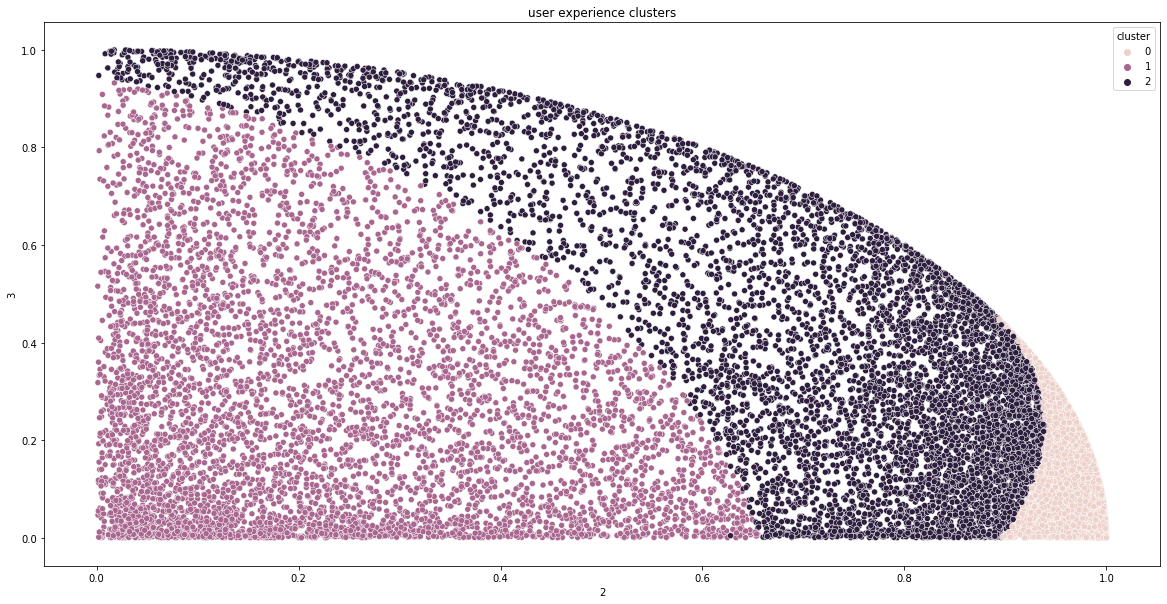

In [104]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
sns.scatterplot(x = 2, y=3,
                hue='cluster', data=df3).set_title('user experience clusters')

plt.show()

In [56]:
df2.to_csv("../data/Experience_data.csv")